<h1 style="text-align: center;"><center>Information Retrieval in High Dimensional Data</center></h1>
<h2 style="text-align: center;"><center>Assignment 1</center></h2>
<center> 

##### by

### Safa Sadiq - 03751043
### Ali Ahmad Khan - 03751040

## **Curse of Dimensionality**

##TASK 1

**Part (i)**

As x is uniformly distributed, pdf of $x$ in $p$ dimensions is:
$$pdf(x) = \frac{1}{1^p} = 1$$
Therefore , $p(x \in C_d) = \int_\frac{-d}{2}^\frac{d}{2}.....\int_\frac{-d}{2}^\frac{d}{2} |\,\,dx_1\,dx_2...dx_p = d^p$
<br>
It is given that $p(x \in C_d) = q$
<br>
Hence:
$$d^p = q$$
which implies that:
$$d = q^\frac{1}{p}$$

**Part (ii)**
<br>
$$P(|X|\le 2.576) = 0.99$$
<br>
=> $ P(||X^p||\le 2.576) = 0.99^p$   --probability of independant events can be multiplied together
<br>
=> $ P(||X^p||> 2.576) = 1 -  P(||X^p||\le 2.576) $    --P(atleast one component of $X^p$ lies outside the $C_d$) = 1 - P(all components lie inside $C_d$)
<br>
=> $ P(||X^p||> 2.576) = 1 - 0.99^p$

for
$$ p = 2, 1 - 0.99^2 = 0.0199$$
$$ p = 3, 1 - 0.99^3 = 0.029701$$
$$ p = 500, 1 - 0.99^2 = 0.90343$$
                         

***
##TASK 2




In [1]:
"""
Import libraries
"""

import numpy as np
import math
import matplotlib.pyplot as plt

**Part (i)**

Sample 100 uniformly distributed random vectors from the box $[−1, 1]^d$
for d = 2

In [2]:
def get_samples(n,d,box):
    """
    Params: n -> number of samples
            d -> dimension of vectors
            box -> domain of vector values
    Returns: list of n uniformly chosen vectors of dimension 1xd

    """
    samples = np.random.uniform(box[0],box[1], [n, d])
    return samples


samples = get_samples(100,2,[-1,1])


**Part (ii)**

For each of the 100 vectors determine the minimum angle to all other vectors.
Then compute the average of these minimum angles.

In [3]:
def compute_angle(vec1, vec2):
    """
    Params: vector1 and vector 2
    Returns: Angle between the two vectors
    """
    dot_product = np.dot(vec1, vec2)    #computes dot product
    vec1_norm = np.linalg.norm(vec1)    #computes norm
    vec2_norm = np.linalg.norm(vec2)
    
    if vec1_norm == 0 or vec2_norm == 0: 
        #return 0 if either norm is 0 to avoid division by 0
        return 0
    
    else :
        #compute angle 
        cos_angle = dot_product / (vec1_norm*vec2_norm)
        angle = np.arccos(cos_angle)   
        return angle

def find_min_angle(vectors):
    """
    Params: list of vectors 
    Computes: Angle from each vector to all other vectors, excluding itself. Then for each vector, finds the minimum angle
    Returns: list of minimum angle from each vector to all other vectors
    """
    n = vectors.shape[0]   #number of samples
    angles = np.ones((n,n)) * 2 * math.pi  #initalized angles to 2* pi as that is the maximum value
    min_angle = np.ones(n)   #vector to store minimum angle for each sample
    
    for i in range(0,n):
        for j in range(0,n):
            if i != j:      #compute angle to every vector other than itself
                angles[i][j] = compute_angle(vectors[i], vectors[j])
    
    for i in range(0,n):
        #find min angle for each sample
        min_angle[i] = min(angles[i])

    return min_angle

def average_min_angle(min_angles):
    """
    Params: list of minimum angles for each vector 
    Returns: average value of the list
    """
    return sum(min_angles) / len(min_angles)

In [4]:
samples = get_samples(100,2,[-1,1])
min_angles = find_min_angle(samples)
average_min_angle = average_min_angle(min_angles)

print("The average of the minimum angles is: ", average_min_angle)

The average of the minimum angles is:  0.03302840087387061


**Part (iii)**

Repeat the above for dimensions d = 1, . . . , 1000 and use the results to plot the
average minimum angle against the dimension.

In [5]:
n = 100
box = [-1,1]
d = 1

dimension = []
angles = []

for d in range(1,1001):   #run for dimensions from 1 to 1000
    samples = get_samples(n,d,box)
    min_angles = find_min_angle(samples)
    avg = sum(min_angles) / len(min_angles)
    
    dimension.append(d)  #append d to dimension array
    angles.append(avg)   #append avg min_angle to angles array


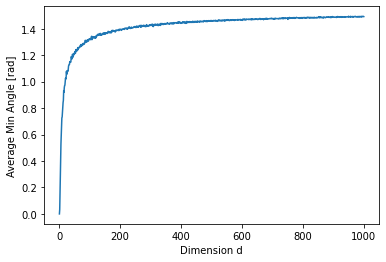

In [6]:
#plot dimension against avergae minimum angle
plt.plot(dimension,angles)
plt.xlabel('Dimension d')
plt.ylabel('Average Min Angle [rad]')

plt.show()

**Part (iv)**

Give an interpretation of the result. What conclusions can you draw for 2 randomly sampled vectors in a d-dimensional space?

1. As the dimension increases, the average minimum angle increases initially and then converges to a value close to 1.5 (pi/2)

2. Hence as the dimension increaes, there is a greater probability that two randomly sampled vectors are close to orthogonal, as the angle between them approaches 90 degrees.


**Part (v)**

Does the result change if the sample size increases?

In [13]:
box = [-1,1] 
samples = np.zeros((7))
dimension = np.zeros((7,1001))  #initialize array to store dimensions
angles = np.zeros((7,1001))     #initialize array to store angles


for n in range(0,7): # run for 7 different sample sizes (100, 120, 140, 160, 180, 200, 220)
    for d in range(1,1001):   #run for dimensions 1 to 1000
        s = get_samples((n*20)+100,d,box)
        min_angles = find_min_angle(s)
        avg = sum(min_angles) / len(min_angles)

        dimension[n][d] = d
        angles[n][d] = avg
    samples[n] = (n*20)+100

   

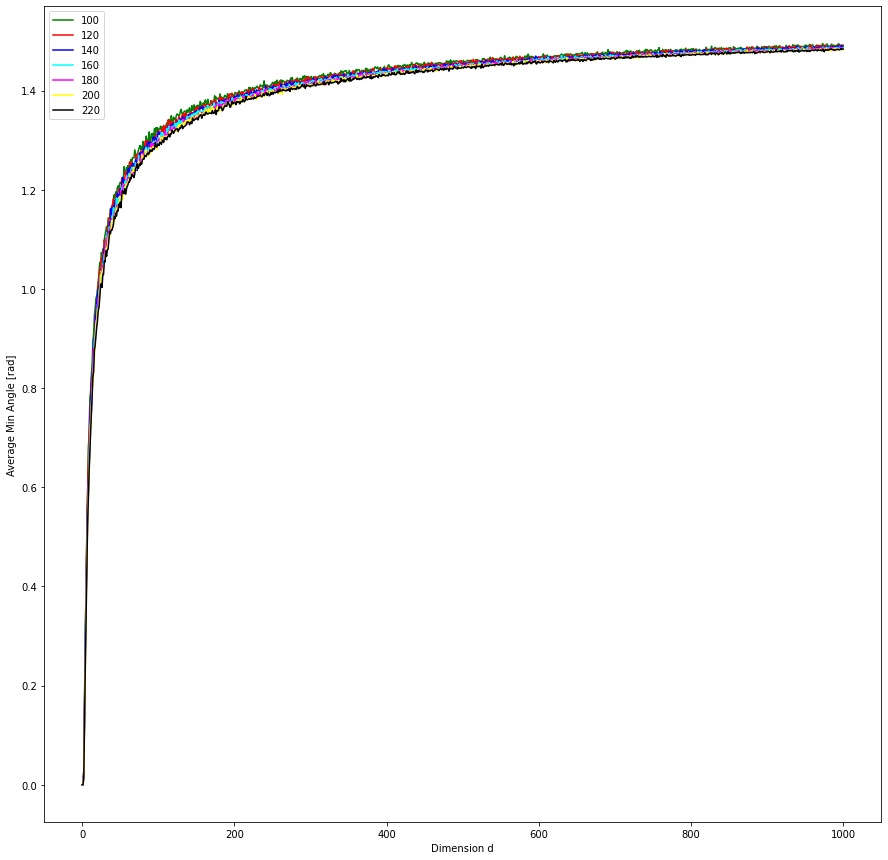

In [20]:
colors = ['green', 'red', 'blue', 'cyan', 'magenta', 'yellow', 'black'] #different colours for each sample size

plt.xlabel('Dimension d')
plt.ylabel('Average Min Angle [rad]')

#plot dimension against minimum average angle for each sample size
for i in range(0,len(colors)):
    plt.plot(dimension[i], angles[i], color=colors[i], label =samples[i] )

plt.rcParams["figure.figsize"] = (20,20)
plt.legend()
plt.show()

Changing the sample size slighly alters the rate at which the average minimum angle increases. As the sample size is increased, the rate at which the average minimum angle increases and the converges, also increases. 
For all sample sizes, however, the average minimum angle converges to the same value of approximately 1.5

***
## **Statistical Decision Making**




## Task 3

**Part(i)**
<br>
Yes, because:<br> 
1. The probabilities sum to 1 <br>
2. The mean and standard deviation can be calculated as: 
$$\mu = \sum_{i=1}^{n}x_i P(x_i) $$
$$\sigma = \sqrt{\sum_{i=1}^{n}(x_i - \mu)^2 + P(x_i)}$$

<br>

**Part(ii)**
<br>
$$E_{Y|X = 2}[Y] = E(Y|X = 2)$$
$$ = \sum_{y} yf_{Y|X}(y|x) $$
$$\sum_{y} P(Y|X = 2) = 0.4 + 0.14 + 0.05 = 0.59$$
<br>
$$\sum_{y} yf_{Y|X}(y|x) = 1(\frac{0.4}{0.59}) +2(\frac{0.14}{0.59}) +3(\frac{0.05}{0.59}) = 1.407$$
<br> and <br>
$$\,\, P(X=1|Y=3) = \frac{P(X=1 \cap Y=3)}{P(Y=3)} = \frac{0.13}{0.13+0.05} = 0.722$$
<br>
**Part(iii)**
<br>
$$p(x,y) = \int_{0}^\frac{1}{2}\int_{0}^1 1\,dx\,dy = \int_{0}^\frac{1}{2} [x]_{0}^{1}\,dy$$
<br>
$$=\int_{0}^\frac{1}{2} [1-0]\,dy$$
<br>
$$=\int_{0}^\frac{1}{2} 1\,dy$$
<br>
$$= [y]_{0}^\frac{1}{2} => \frac{1}{2} - 0 => \frac{1}{2} \ne 0$$

**part (iv)**
<br>
for X:
<br>
$$p(x) =  \int_{x}^\infty p(x,y)\,dy$$
<br>
$$=\int_{x}^\infty 2e^{-(x+y)}\,dy$$
<br>
$$=2e^{-x}\int_{x}^\infty e^{-y}\,dy$$
<br>
$$=2e^{-x}[-e^{-y}]^{\infty}_x$$
<br>
$$=2e^{-x}[0 -(-e^{-x})]$$
<br>
$$= 2e^{-x}(e^{-x})$$
<br>
$$ = 2e^{-2x} $$


<br>
For Y:
<br>
$$p(y) =  \int_{0}^y 2e^{-(x+y)}\,dx$$
<br>
$$=2e^{-y}\int_{0}^y e^{-x}\,dx$$
<br>
$$= 2e^{-y}[-e^{-x}]^{y}_0$$
<br>
$$= 2e^{-y}(-e^{-y}+1)$$
<br>
$$= 2e^{-2y} + 2e^{-y}$$

**part (v)**
<br>
$$p(y) =  \int_{0}^3 p(x,y)\,dx$$
<br>
$$=  \int_{0}^3 \frac{1}{15}(2x + 4y)\,dx$$
<br>
$$=  \frac{1}{15}\int_{0}^3 (2x + 4y)\,dx$$
<br>
$$=  \frac{1}{15}[x^2 + 4xy]^{3}_{0}$$
<br>
$$=  \frac{1}{15}[9 + 12y - 0 - 0]$$
<br>
$$=  \frac{1}{15}[12y + 9]$$
<br>
$$=  \frac{1}{5}[4y + 3]$$
<br>
<br>
<br>
$$P(X \le 2 | Y = \frac{1}{2}) = \int_{0}^2 \frac{p(x,y)}{p(y)}\,dx\;\;\;\;given\, y = \frac{1}{2}$$
<br>
$$= \int_{0}^2 \frac{\frac{1}{15}(2x+4y)}{\frac{1}{5}(4y+3)}\,dx\;\;\;\;given\, y = \frac{1}{2}$$
<br>
$$= \int_{0}^2 \frac{2x+4y}{3(4y+3)}\,dx\;\;\;\;given\, y = \frac{1}{2}$$
<br>
$$= \int_{0}^2 \frac{2x+4(\frac{1}{2})}{3(4(\frac{1}{2})+3)}\,dx$$
<br>
$$= \int_{0}^2 \frac{2x+2}{15}\,dx$$
<br>
$$= \frac{2}{15}\int_{0}^2 x+1\,dx$$
<br>
$$= \frac{2}{15}[\frac{1}{2}x^2 + x]^{2}_{0}$$
<br>
$$=\frac{2}{15}(\frac{4}{2}+2-0-0)$$
<br>
$$= \frac{2\times4}{15}$$
<br>
$$= \frac{8}{15}$$



***
### Task 4

Covariance Matrix C for any random variable $x \in R^p$ is defined as: 
$$C_x = E[(X - E(X))(X-E(X))^T]$$
Proof that $C_x$ is symmetric:
<br>
Show that $C_x = C_{x}^{T}$
$$C_x = E[(X - E(X))(X-E(X))^T]$$
$$Let\,E(X) = \mu$$
$$= E[(X - \mu)(X-\mu)^T]$$
$$= E[(X - \mu)(X^T-\mu^T)]$$
$$= E[XX^T - X\mu^T - \mu X^T + \mu\mu^T]$$
<br>
using Linearty of Expectation
$$= E(XX^T) - E(X\mu^T) - E(\mu X^T) + E(\mu\mu^T)$$ 
<br>
using Expectation of Constant = Constant
$$= E(XX^T) - E(X)\mu^T - \mu E(X^T) + \mu\mu^T$$ 
<br>
Replacing $E(x)$ with $\mu$
$$=E(XX^T) - \mu\mu^T - \mu\mu^T + \mu\mu^T$$ 
$$=E(XX^T) - \mu\mu^T              (*)$$ 
$$=((E(XX^T) - \mu\mu^T)^T)^T$$
$$=((E(XX^T))^T - (\mu\mu^T)^T)^T$$
$$=(E((XX^T)^T) - (\mu\mu^T)^T)^T$$
$$=(E((X^T)^TX^T) - (\mu^T)^T\mu^T)^T$$
$$=(E(XX^T) - \mu\mu^T)^T$$
Using (*)
$$=C_x^T$$

Proof that  $C_x$ is positive semidefinite:
<br>
Show that $x^TC_x \ge 0$
$$C_x = E[(X - E(X))(X-E(X))^T]$$
<br>
Using $E(X)$ = $\mu$
$$= E[(X - \mu)(X-\mu)^T]$$
<br>

$$x^TC_xx = x^TE[(X - \mu)(X-\mu)^T]x$$
<br>
Expectation of Constant = Constant
$$=E[x^T(X - \mu)(X-\mu)^Tx]$$
<br>
Using $A^Tx$ = $(x^TA)^T$
$$=E[(x^T(X - \mu))(x^T(X-\mu))^T]$$
$$=E[(x^T(x-\mu))^2]$$
<br>
Using $A^2 \ge 0$
$$=E[(x^T(x-\mu))^2] \ge 0$$
